# VAR Performance with Different Lagging - Team Gannett Peak

### Team Members: Congda Xu, Binqi Shen,  Matthew Ko, Isaac Choi

#### import packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
from statsmodels.tsa.vector_ar.var_model import VAR
warnings.filterwarnings('ignore')

### Define Functions that will be Used

In [2]:
def load_data(file): 
    # initialize an empty list to store info of each company
    result = []
    data = pd.read_csv(file)
    data = data.drop(['Cbsa_Pop_Percentile(20s)_min', 'Cbsa_Pop_Percentile(20s)_max'], axis='columns')
    
    # remove any null/infinite rows
    data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]
    
    # each group has full information of a unique company ticker 
    grouped = data.groupby(['Ticker'])
    l_grouped = list(grouped)
    
    for item in l_grouped:
        df = item[1]
        df = df.drop(['Ticker'], axis='columns')
        df['Date'] = pd.to_datetime(df.Date , format = '%Y-%m')  # store all Date info in monthly interval
        df = df.set_index(['Date'])
        result.append(df)
    return result   # return a list of dataframes where each dataframe contains info of one company's monthly data

In [3]:
def find_constant(df):
    for column in df.columns:
        if len(df[column].unique()) == 1:
            return True
    return False

### Load Dataset
*ranging from 0-month-lagging to 5-month-lagging), here we load 2-month-lagging dataset as an example*

In [4]:
dfs = load_data('final_data_2.csv')

### Fit Vector Autoregression (VAR) Model

In [11]:
AES = []
APES = []

for i in range(len(dfs)):
    df_i = dfs[i]                          # info of each company
    if not find_constant(df_i) and len(df_i) >= 12 and df_i['Adj Close'].mean() < 5000:
        train_i = df_i[:-1]                # all data except the last month
        validate_i = df_i[-1:]             # last month data (actual)
        
        model = VAR(endog=train_i)         # train VAR model
        model_fit = model.fit() 
        
        prediction = model_fit.forecast(model_fit.y, steps=1)     # predict last month
        AE = abs(prediction[0][-1] - validate_i.iloc[0][-1])      # absolute error
        APE = abs((prediction[0][-1] - validate_i.iloc[0][-1]) * 100.0 / validate_i.iloc[0][-1])  # absolute percentage error
        AES.append(AE)
        APES.append(APE)
        print('AE: ', AE, ' APE: ', APE)   # print absolute error and absolute percentage error for prediction of each company
        
MAE = sum(AES) / len(AES)                  # mean absolute error over all companies
MAPE = sum(APES) / len(APES)               # mean absolute percentage error over all companies

print("MAE: ", MAE)
print("MAPE: ", MAPE, '%')

AE:  2.0628781587991085  APE:  2.460544921766754
AE:  7.3383865246633135  APE:  51.35329981982535
AE:  3.955924809562511  APE:  14.323751976680194
AE:  7.860178279890761  APE:  12.563151601546453
AE:  3.912312818350401  APE:  7.232973360247906
AE:  44.988254589273964  APE:  33.522063012430216
AE:  1.6779934913199952  APE:  3.026552455856557
AE:  20.248065850610956  APE:  88.11168952982707
AE:  2.3561437021158085  APE:  7.740035786651921
AE:  1.8095501564826009  APE:  2.1801809114248205
AE:  10.484249876631168  APE:  13.34941904929446
AE:  0.10384806701227944  APE:  0.1184290677067396
AE:  1.2952586461379099  APE:  3.039068032083506
AE:  0.08366199413386144  APE:  8.900212164474366
AE:  7.921212683029282  APE:  7.9666224064337525
AE:  0.4075645903399092  APE:  1.0670422263269606
AE:  4.518486460084858  APE:  2.4182426076997827
AE:  2.3369208497022527  APE:  2.6511041600048126
AE:  5.626672112040893  APE:  14.073717299813053
AE:  0.02044536521872331  APE:  0.11557583155162116
AE:  1.4531

AE:  9.036737437717704  APE:  8.979752810981331
AE:  13.345976877224402  APE:  9.876510475541206
AE:  6.852808194815566  APE:  6.946587013501328
AE:  23.049603721853252  APE:  184.69234428932458
AE:  1.9020921442611405  APE:  20.21351939537219
AE:  10.786234215586376  APE:  8.212632375027653
AE:  5.631512759206107  APE:  19.718182298713447
AE:  18.783484417927582  APE:  15.519049433291197
AE:  52.94179855390118  APE:  36.872682740452845
AE:  56.22056712678386  APE:  5.174084687786591
AE:  2.5471790806732315  APE:  2.0820493353932936
AE:  4.654919819028009  APE:  10.336253277901665
AE:  8.117167050892718  APE:  12.510501362655486
AE:  31.68420535960803  APE:  9.858558304301946
AE:  2.184183827770724  APE:  6.657315624391075
AE:  3.3640035327264  APE:  4.322167260220633
AE:  0.6740437916609672  APE:  4.1895435932969445
AE:  11.772602479202291  APE:  16.17782468363491
AE:  3.0319362556463645  APE:  5.242963100025658
AE:  2.1062032738363996  APE:  2.342568531612472
AE:  0.10241616032061529

AE:  0.00220509144165959  APE:  0.005226573864507371
AE:  1.816710800833924  APE:  4.178267755198979
AE:  0.6268853000842078  APE:  2.8533895020652307
AE:  5.468911307661891  APE:  14.21973852794458
AE:  2.286358905090907  APE:  3.3490663030295873
AE:  1.1037075120832718  APE:  10.286184148832115
AE:  22.806477038907786  APE:  987.2934027637058
AE:  0.7150273971193286  APE:  5.400509135046171
AE:  5.019094817061621  APE:  10.709282152830713
AE:  0.203196377967771  APE:  0.23799061197514454
AE:  5.444536568677229  APE:  19.3340627264985
AE:  10.034679776408495  APE:  67.21151755723525
AE:  8.702778373598331  APE:  30.751867873556407
AE:  6.585443673848204  APE:  4.291357604048147
AE:  7.0643809932781  APE:  11.928676844086215
AE:  2.7002426703632167  APE:  12.812941281409138
AE:  6.85800877193077  APE:  19.367343388986637
AE:  1.3243833693031917  APE:  3.0532603775102602
AE:  11.51968751975707  APE:  17.263130436453235
AE:  24.199420567861637  APE:  11.21123021170168
AE:  34.70792084186

AE:  10.315093281834862  APE:  6.805681264017176
AE:  1.0428016916584752  APE:  2.4001355512949902
AE:  0.43538235859840624  APE:  19.350327048818055
AE:  3.1592711605553596  APE:  15.683563481977979
AE:  5.3345094070171655  APE:  7.000762018449903
AE:  11.90987415940306  APE:  10.539711645489433
AE:  3.2296919639521633  APE:  7.692280304490362
AE:  0.868151456699541  APE:  18.510691814661794
AE:  7.066027621228244  APE:  9.549788707043904
AE:  16.436723017163413  APE:  88.36947677451941
AE:  9.239460865279966  APE:  4.672845042831809
AE:  6.596995067871866  APE:  515.3902511973594
AE:  0.9275990908332687  APE:  9.57274644997019
AE:  3.088576732696339  APE:  4.301493828718374
AE:  2.89754075957201  APE:  14.953192827708904
AE:  4.6517945673249415  APE:  5.4693509548392365
AE:  0.10526353501707186  APE:  3.4626163269064185
AE:  1.244741821353145  APE:  4.410460024631127
AE:  11.791798838274335  APE:  311.9523525800164
AE:  0.14030525528824  APE:  0.18675127017292426
AE:  0.0319340403579

AE:  1.3416307101914597  APE:  10.582871638983104
AE:  2.14408918455063  APE:  5.285853842539598
AE:  1.575737582594904  APE:  9.248953603814991
AE:  0.6510693997147778  APE:  43.11717906137434
AE:  0.10139319666816249  APE:  0.7124279493246521
AE:  3.5230760346205514  APE:  16.379184259359846
AE:  0.4615572860894588  APE:  0.8519656993126089
AE:  76.45414512964817  APE:  13.85076229442822
AE:  5.1527936404323675  APE:  21.331555607454572
AE:  0.3395522444411654  APE:  0.4357703444819799
AE:  1.3922794980894437  APE:  6.041907686548198
AE:  1.7919248808376764  APE:  6.237121160420993
AE:  0.08393955803161646  APE:  0.13489145053143745
AE:  0.8854471371185682  APE:  1.689422114462585
AE:  0.029997324710919315  APE:  0.052214663729422184
AE:  1.369929878690881  APE:  12.708069690399702
AE:  0.5249371505546634  APE:  2.98910037726205
AE:  0.46521880262914017  APE:  7.6390606071076945
AE:  0.490506248212359  APE:  1.816190848178691
AE:  2.949999453034579  APE:  8.9588546078161
AE:  3.41574

AE:  0.4081309393774717  APE:  0.8353068650822005
AE:  27.18042665529373  APE:  9.536292328825432
AE:  0.5447100843906654  APE:  1.755973163953833
AE:  0.6594272047347918  APE:  14.556891262543452
AE:  4.2932662080199435  APE:  7.209515135221123
AE:  24.637393706576546  APE:  30.14175480130429
AE:  1.0983018479699567  APE:  12.00329938534328
AE:  3.4534612936994833  APE:  8.53658983968067
AE:  12.011941503579664  APE:  9.160330249598044
AE:  7.482702295028531  APE:  9.43594200134481
AE:  0.8741796345779171  APE:  3.7041509341004346
AE:  0.1659426068173815  APE:  0.9067902389925792
AE:  1.9605441988459944  APE:  5.63637737796219
AE:  13.914051035425025  APE:  27.629171697358903
AE:  0.35865183786336985  APE:  1.2027904820204665
AE:  1.9896563324673409  APE:  16.34886047653369
AE:  0.3595757921461029  APE:  1.5594181529597229
AE:  0.05625346678915477  APE:  0.4924882782324565
AE:  0.5341096442051896  APE:  4.507254236382947
AE:  0.06793782139801285  APE:  7.305142029624557
AE:  28.229876

AE:  1.4533528301860024  APE:  4.6789078821233305
AE:  2.2873759084543117  APE:  23.58119539620487
AE:  4.533857925986524  APE:  5.223728714991875
AE:  5.881471550874295  APE:  7.386861968458315
AE:  1.0240034954096622  APE:  5.437578059401552
AE:  0.40351684083201356  APE:  3.675016918532841
AE:  9.01387359561312  APE:  6.669533113347478
AE:  9.599557255643461  APE:  20.533812311536813
AE:  0.6469219465768612  APE:  12.56159096305232
AE:  3.4384999504731013  APE:  8.314061659358934
AE:  1.6167939880374496  APE:  17.291913605069883
AE:  0.45760179420601155  APE:  4.8577684766436136
AE:  8.129397438202886  APE:  0.6918047491362889
AE:  11.596444002186473  APE:  29.4802927657108
AE:  15.703780156419555  APE:  5.935038949554344
AE:  4.911796442639272  APE:  4.3435429692961
AE:  2.323580322840158  APE:  6.41518565579731
AE:  17.70263735010704  APE:  11.201970129399811
AE:  1.8188821209501782  APE:  2.5136626930726473
AE:  3.853700890510666  APE:  10.409780774874315
AE:  2.1406142310639407 

AE:  0.8139438083900643  APE:  0.9437693350486525
AE:  0.1445416566119313  APE:  0.9188916771664564
AE:  5.313191049837828  APE:  63.631027629996645
AE:  2.062876476944382  APE:  3.903324618747354
AE:  4.036336861048174  APE:  13.515724766820066
AE:  0.7029623022936562  APE:  2.8988136177057986
AE:  4.5253365791107  APE:  6.298295926531154
AE:  0.29822260193206773  APE:  0.7581605067854729
AE:  6.067179929448173  APE:  17.44896402116138
AE:  3.936210333864861  APE:  46.971483056208406
AE:  0.381674097667565  APE:  7.425566295365088
AE:  0.697877201783065  APE:  1.4609655048446926
AE:  8.815743545818322  APE:  3.7040939268144206
AE:  3.181441871435812  APE:  15.4363987249855
AE:  3.581716053492066  APE:  6.937968765771919
AE:  1.3982539682485111  APE:  1.6434628600009833
AE:  0.21090501038364096  APE:  0.30466368283253675
AE:  1.6895822902515363  APE:  11.276248884298557
AE:  2.1067174125800534  APE:  7.612231066655422
AE:  0.8415583013710712  APE:  6.1382457975337505
AE:  0.24992211118

AE:  0.6437366804015454  APE:  21.38660074555251
AE:  2.902121773747467  APE:  8.686386671660705
AE:  16.790888905229693  APE:  161.91792758466784
AE:  7.747028098420088  APE:  8.213571518661412
AE:  3.9163336598377487  APE:  22.391845117716496
AE:  1.1475879393456143  APE:  27.388733261901084
AE:  0.2743711311274204  APE:  1.7599174370878736
AE:  3.260145768979285  APE:  32.246744606228454
AE:  3.652381023186443  APE:  20.894628826284116
AE:  1.084202998222576  APE:  3.7163522519410312
AE:  2.1053533397281505  APE:  9.081829756376926
AE:  2.738865845584993  APE:  16.875329161023533
AE:  1.6251115130616718  APE:  10.439670015712657
AE:  0.9405133725778683  APE:  2.793513761257367
AE:  0.947618594632246  APE:  4.467621027644448
AE:  25.479529522552724  APE:  18.111393248108552
AE:  27.88116486537203  APE:  41.732024972639266
AE:  2.9337667627247797  APE:  8.95347041712686
AE:  7.77413700124994  APE:  8.528013041843764
AE:  1.109793953124338  APE:  83.93399578212896
AE:  8.38469187665811

AE:  3.1039439481955924  APE:  0.9722902191564257
AE:  3.3762804244902753  APE:  3.9713877525747483
AE:  10.385404374702091  APE:  12.8309909333401
AE:  0.6872938748956612  APE:  14.141848889182222
AE:  5.514495860781523  APE:  7.021334770743173
AE:  11.7001724284561  APE:  15.804636797762791
AE:  6.475483522791436  APE:  11.275437033573972
AE:  5.45784512534906  APE:  12.218006179615843
AE:  6.017151224388847  APE:  53.39086938762061
AE:  2.813078468311012  APE:  10.708367807748493
AE:  15.464194089931567  APE:  16.56937082024786
AE:  11.830790004656706  APE:  3.771490934546619
AE:  1.4695583450849057  APE:  4.049110574813301
AE:  32.096981104572066  APE:  56.99037869050586
AE:  5.769784558759113  APE:  7.237197738605859
AE:  2.0181307338447  APE:  7.153955332651957
AE:  16.652630131479015  APE:  38.343610440855635
AE:  1.2727639061656504  APE:  3.9753352332388037
AE:  5.637449376787959  APE:  27.546678685052
AE:  14.755940076768724  APE:  11.074065179915529
AE:  3.0833410724407937  A

AE:  6.4237560256677995  APE:  7.383627615710114
AE:  4.373344078544715  APE:  29.255353232659186
AE:  10.634274054642255  APE:  22.511163583403576
AE:  2.467180112411299  APE:  4.921564053148462
AE:  7.855000138763714  APE:  17.283698773387002
AE:  0.4970005185887203  APE:  8.174350737257484
AE:  1.9211393155611312  APE:  15.05595047884636
AE:  4.754362850264101  APE:  3.459174090425438
AE:  0.9002037728884389  APE:  2.7554448219839016
MAE:  63893252632.76242
MAPE:  1277865080699931.0 %


### Detect & Remove Outliers

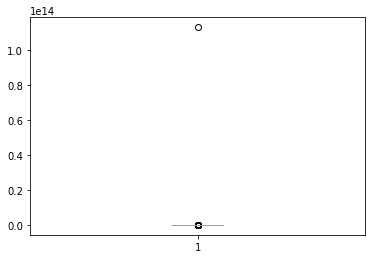

In [6]:
# Plot 'Absolute Error' distribution in box plot to detect outliers 
plt.boxplot(AES)
plt.show()

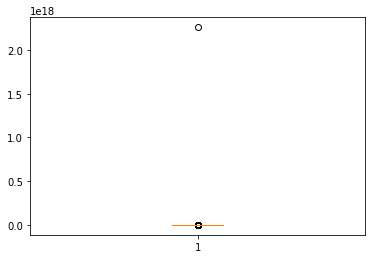

In [7]:
# plot 'Absolute Percentage Error' distribution in box plot to detect outliers 
plt.boxplot(APES)
plt.show()

In [8]:
# define outliers 
AES_Over100 = [i for i in AES if i > 100]
APES_Over1000 = [i for i in APES if i > 1000]
print(len(AES_Over100))
print(len(APES_Over1000))

15
9


In [10]:
# remove outliers
AES_Without_Outlier = [i for i in AES if i <= 100]
APES_Without_Outlier = [i for i in APES if i <= 1000]

# calculate 'Mean Absolute Error' & 'Mean Absolute Percentage Error' after removing the outliers
MAE_Without_Outlier = sum(AES_Without_Outlier)/len(AES_Without_Outlier)
MAPE_Without_Outlier = sum(APES_Without_Outlier) / len(APES_Without_Outlier)
print('MAE: ', MAE_Without_Outlier)       # Mean Absolute Error
print('MAPE: ', MAPE_Without_Outlier, '%')     # Mean Absolute Percentage Error

MAE:  5.8275085583454285
MAPE:  18.647579345426752 %


**NOTE**: We ran this for 6 times using different lagging periods (0-month-lagging to 5-month-lagging), and 2-month-lagging gives the lowest MAE & MAPE, hence gives the best result. The values are shown above. 